In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from nltk.stem import PorterStemmer
from string import punctuation
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob
nltk.download('stopwords')

import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
tweets_df = pd.read_csv('vaccination_all_tweets.csv')

In [3]:
tweets_df.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
tweets_df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [5]:
tweets_df=tweets_df.drop(['user_name','user_location','user_followers','user_friends','user_favourites','user_verified','hashtags','source','user_created','user_description'],axis =1)
tweets_df.head(5)

,id,date,text,retweets,favorites,is_retweet
0,1340539111971516416,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,0,0,False
1,1338158543359250433,2020-12-13 16:27:13,While the world has been on the wrong side of ...,1,1,False
2,1337858199140118533,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0,0,False
3,1337855739918835717,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",446,2129,False
4,1337854064604966912,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,0,0,False


In [6]:
tweets_df.isnull().sum()

id            0
date          0
text          0
retweets      0
favorites     0
is_retweet    0
dtype: int64

In [7]:
tweets_df.text.value_counts()[:10]

#COVAXIN vaccine approved for children aged 2 - 18 ... Another milestone in handling #COVID19 ... Well done scientists .    18
Got my second dose of the #Moderna #vaccine today!! 💉💉                                                                      16
@naashonomics #Covaxin #Ocgn #OCGN #DeltaVariant $ocgn LETS KICK THE DELTA VARIANT'S ASS IN EVERY COUNTRY!!!                11
@POTUS Approve #COVAXIN                                                                                                      8
India gets covid vaccine for kids.\n#Covaxin approved for kids aged 2-18.                                                    7
Big News: \n#Covaxin approved for kids 2-18                                                                                  6
BREAKING NEWS :  #SputnikV approved for emergency use in India.                                                              6
560057, \nAGE 45+\n0-D1, 44-D2 slots,\n#COVAXIN on 18-06-2021\n@ NEL COVAXIN(Free) #BBMP                       

In [8]:
tweets_df.shape

(228207, 6)

In [9]:
tweets_df.describe()

,id,retweets,favorites
count,2.282070e+05,228207.000000,228207.000000
mean,1.407541e+18,2.489284,10.819020
std,2.908485e+16,51.079821,199.527693
min,1.337728e+18,0.000000,0.000000
25%,1.381940e+18,0.000000,0.000000
50%,1.408133e+18,0.000000,0.000000
75%,1.428688e+18,1.000000,2.000000
max,1.463251e+18,12294.000000,54017.000000


In [10]:
tweets_df.head(5)

,id,date,text,retweets,favorites,is_retweet
0,1340539111971516416,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,0,0,False
1,1338158543359250433,2020-12-13 16:27:13,While the world has been on the wrong side of ...,1,1,False
2,1337858199140118533,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0,0,False
3,1337855739918835717,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",446,2129,False
4,1337854064604966912,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,0,0,False


In [11]:
tweets_df.isnull().sum()

id            0
date          0
text          0
retweets      0
favorites     0
is_retweet    0
dtype: int64

In [12]:
tweets_df.head()

,id,date,text,retweets,favorites,is_retweet
0,1340539111971516416,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,0,0,False
1,1338158543359250433,2020-12-13 16:27:13,While the world has been on the wrong side of ...,1,1,False
2,1337858199140118533,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0,0,False
3,1337855739918835717,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",446,2129,False
4,1337854064604966912,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,0,0,False


In [13]:
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [14]:
Covid_refs=['Covid Vaccine','CovidVaccine','COVID19','Coronavirus', 'Corona','Covid-19','']
Pfizer_refs=['PfizerBioNTech', 'Pfizer','Pfizer-BioNtech','BioNtech', 'pfizer vaccine','freerange']
AstraZeneca_refs=['Astra vaccine','AstraZeneca Vaccine', 'AstraZeneca', 'Oxford-AstraZeneca','astrazeneca']
Moderna_refs = ['ModernaVaccine', 'Moderna', 'Moderna Vaccine', 'Moderna vaccine', 'Moderna &amp', 'modenavaccine', 'moderna']

In [15]:
def identify_subject(tweet, refs):
    flag = 0
    for ref in refs:
        if tweet.find(ref) !=-1:
            flag =1
    return flag

tweets_df['Covid']=tweets_df['text'].apply(lambda x: identify_subject(x, Covid_refs ))
tweets_df['Pfizer']=tweets_df['text'].apply(lambda x: identify_subject(x, Pfizer_refs))
tweets_df['AstraZeneca']=tweets_df['text'].apply(lambda x: identify_subject(x, AstraZeneca_refs))
tweets_df['Moderna']=tweets_df['text'].apply(lambda x: identify_subject(x, Moderna_refs))

In [16]:
tweets_df.head()

,id,date,text,retweets,favorites,is_retweet,Covid,Pfizer,AstraZeneca,Moderna
0,1340539111971516416,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,0,0,False,1,1,0,0
1,1338158543359250433,2020-12-13 16:27:13,While the world has been on the wrong side of ...,1,1,False,1,0,0,0
2,1337858199140118533,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0,0,False,1,1,1,1
3,1337855739918835717,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",446,2129,False,1,0,0,0
4,1337854064604966912,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,0,0,False,1,1,0,0


In [17]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    txt = re.sub(r'#', '',txt)
    txt = re.sub(r'RT: ', '',txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',txt)
    return txt

In [18]:
tweets_df['text'] = tweets_df['text'].apply(cleanUpTweet)

In [19]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [20]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [21]:
tweets_df['Subjectivity']= tweets_df['text'].apply(getTextSubjectivity)
tweets_df['Polarity']= tweets_df['text'].apply(getTextPolarity)

In [22]:
tweets_df.dtypes

id                int64
date             object
text             object
retweets          int64
favorites         int64
is_retweet         bool
Covid             int64
Pfizer            int64
AstraZeneca       int64
Moderna           int64
Subjectivity    float64
Polarity        float64
dtype: object

In [23]:
from datetime import datetime
date_format = "%Y-%m-%dT%H:%M:%S" 
tweets_df["date"]   = pd.to_datetime(tweets_df["date"],format = date_format)

In [24]:
tweets_df.head(20)
Covid = tweets_df[tweets_df['Covid'] ==1][['date','Polarity']]
Covid = Covid.sort_values(by = 'date', ascending = True)
Covid['OR Polarity'] = Covid.Polarity.rolling(10, min_periods=3).mean()

Pfizer = tweets_df[tweets_df['Pfizer'] ==1][['date','Polarity']]
Pfizer = Pfizer.sort_values(by = 'date', ascending = True)
Pfizer['OR Polarity'] = Pfizer.Polarity.rolling(10, min_periods=3).mean()

AstraZeneca = tweets_df[tweets_df['AstraZeneca'] ==1][['date','Polarity']]
AstraZeneca = AstraZeneca.sort_values(by = 'date', ascending = True)
AstraZeneca['OR Polarity'] = AstraZeneca.Polarity.rolling(10, min_periods=3).mean()

Moderna = tweets_df[tweets_df['Moderna'] ==1][['date','Polarity']]
Moderna = Moderna.sort_values(by = 'date', ascending = True)
Moderna['OR Polarity'] = Moderna.Polarity.rolling(10, min_periods=3).mean()

In [25]:
Pfizer.head()

,date,Polarity,OR Polarity
44,2020-12-12 11:55:28,0.0,NaN
42,2020-12-12 12:12:35,0.0,NaN
41,2020-12-12 12:16:14,0.0,0.0
40,2020-12-12 12:16:27,0.0,0.0
38,2020-12-12 12:19:56,0.0,0.0


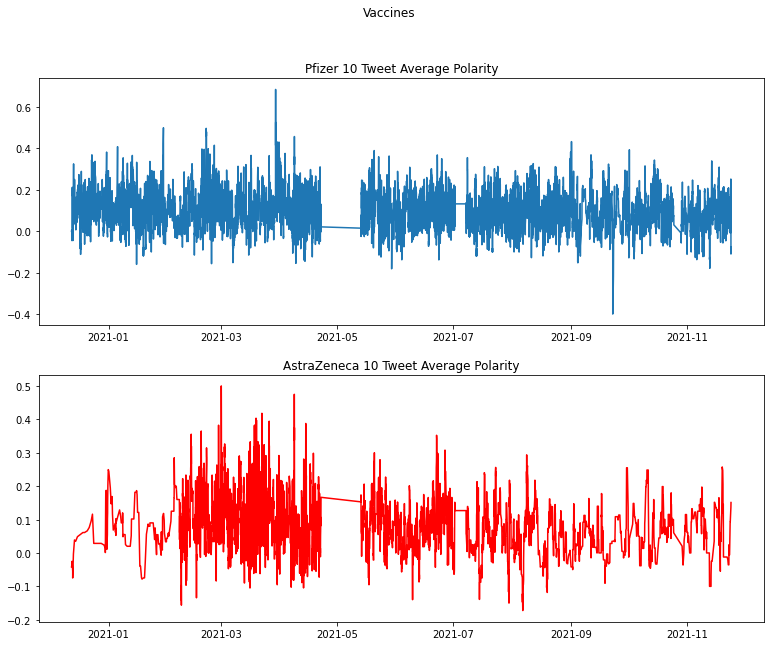

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(13,10))

axes[0].plot(Pfizer['date'], Pfizer['OR Polarity'])
axes[0].set_title("\n".join(['Pfizer 10 Tweet Average Polarity']))

axes[1].plot(AstraZeneca['date'], AstraZeneca['OR Polarity'], color='red')
axes[1].set_title("\n".join(['AstraZeneca 10 Tweet Average Polarity']))

fig.suptitle('\n'.join(['Vaccines']), y=0.98)
plt.show()

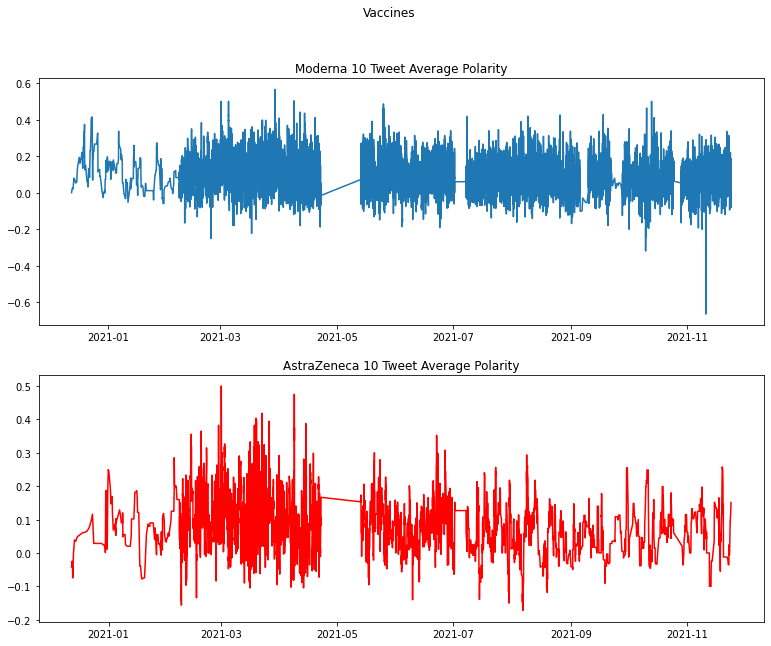

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(13,10))

axes[0].plot(Moderna['date'], Moderna['OR Polarity'])
axes[0].set_title("\n".join(['Moderna 10 Tweet Average Polarity']))

axes[1].plot(AstraZeneca['date'], AstraZeneca['OR Polarity'], color='red')
axes[1].set_title("\n".join(['AstraZeneca 10 Tweet Average Polarity']))

fig.suptitle('\n'.join(['Vaccines']), y=0.98)
plt.show()

In [28]:
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"

In [29]:
tweets_df["Score"]= tweets_df['Polarity'].apply(getTextAnalysis)

In [30]:
tweets_df.head(10)

,id,date,text,retweets,favorites,is_retweet,Covid,Pfizer,AstraZeneca,Moderna,Subjectivity,Polarity,Score
0,1340539111971516416,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,0,0,False,1,1,0,0,0.125000,0.000,Neutral
1,1338158543359250433,2020-12-13 16:27:13,While the world has been on the wrong side of ...,1,1,False,1,0,0,0,0.900000,-0.500,Negative
2,1337858199140118533,2020-12-12 20:33:45,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0,0,False,1,1,1,1,0.033333,0.000,Neutral
3,1337855739918835717,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",446,2129,False,1,0,0,0,0.550000,-0.050,Negative
4,1337854064604966912,2020-12-12 20:17:19,Explain to me again why we need a vaccine wh...,0,0,False,1,1,0,0,0.000000,0.000,Neutral
5,1337852648389832708,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,0,0,False,1,0,0,0,0.250000,0.400,Positive
6,1337851215875608579,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,0,4,False,1,0,0,0,0.500000,-0.100,Negative
7,1337850832256176136,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,2,22,False,1,0,0,0,0.587500,0.675,Positive
8,1337850023531347969,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n CovidVaccin...,2,1,False,1,1,0,1,0.000000,0.000,Neutral
9,1337842295857623042,2020-12-12 19:30:33,CovidVaccine \n\nStates will start getting COV...,0,0,False,1,0,0,0,0.000000,0.000,Neutral


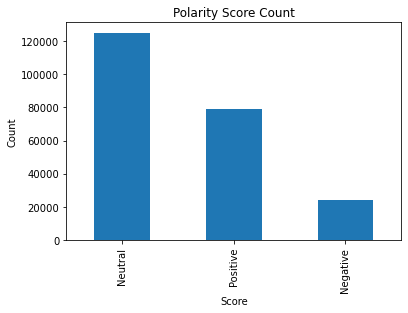

In [31]:
tweets_df['Score'].value_counts().plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Polarity Score Count')
plt.show()

<AxesSubplot:xlabel='Score', ylabel='count'>

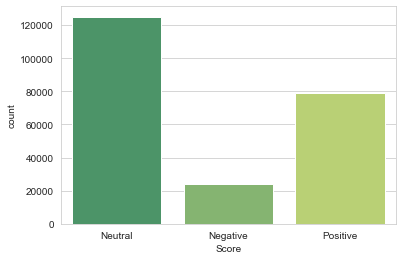

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Score',data=tweets_df, palette='summer')

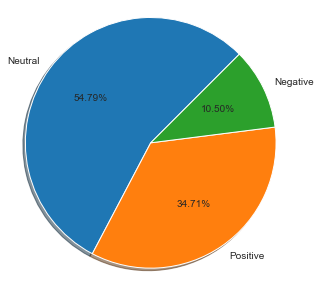

In [33]:
# Count the number of tweets in each score category
score_counts = tweets_df['Score'].value_counts()

# Labels for the score categories
labels = score_counts.index.tolist()

# Sizes for each score category
sizes = score_counts.values.tolist()

# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise
plt.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=45)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()


In [34]:
# Store the column of the dataframe named as "Tweet"
X = tweets_df['text']

# Display the value "X"
print(X)

0         Same folks said daikon paste could treat a cyt...
1         While the world has been on the wrong side of ...
2         coronavirus SputnikV AstraZeneca PfizerBioNTec...
3         Facts are immutable, Senator, even when you're...
4         Explain to me again why we need a vaccine   wh...
                                ...                        
228202    45+ URBAN Bengaluru CovidVaccine Availability ...
228203    18-44 BBMP Bengaluru CovidVaccine Availability...
228204    18-44 URBAN Bengaluru CovidVaccine Availabilit...
228205    They promote their Vaccines leaving out the st...
228206    45+ URBAN Bengaluru CovidVaccine Availability ...
Name: text, Length: 228207, dtype: object


In [35]:
# Store the column if the dataframe named as  "Score"
y = tweets_df['Score']

# Display the column of the dataframe named as "Score"
print(y)

0          Neutral
1         Negative
2          Neutral
3         Negative
4          Neutral
            ...   
228202    Positive
228203    Positive
228204    Positive
228205     Neutral
228206    Positive
Name: Score, Length: 228207, dtype: object


In [36]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Store the string.punctuation into an object punct
punct = string.punctuation

# Initialise an object using a method PorterStemmer
stemmer = PorterStemmer()

In [38]:
import re

cleaned_data=[]

# For loop from first value to length(X), ^a-zA-Z means include small and capital case letters

for i in range(len(X)):
    tweet = re.sub('[^a-zA-Z]', ' ', X.iloc[i])
    tweet = tweet.lower().split()
    tweet = [stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
    tweet = ' '.join(tweet)
    cleaned_data.append(tweet)

In [39]:
# Display the cleaned_data
cleaned_data

['folk said daikon past could treat cytokin storm pfizerbiontech',
 'world wrong side histori year hope biggest vaccin effort ev',
 'coronaviru sputnikv astrazeneca pfizerbiontech moderna covid russian vaccin creat last year',
 'fact immut senat even ethic sturdi enough acknowledg born',
 'explain need vaccin whereareallthesickpeopl pfizerbiontech',
 'anyon use advic guidanc whether covid vaccin safe whilst breastfeed',
 'bit sad claim fame success vaccin patriot competit usa canada uk',
 'mani bright day best bidenharri win elect',
 'covid vaccin get covidvaccin covid pfizerbiontech moderna',
 'covidvaccin state start get covid vaccin monday us say pakustv nyc healthcar globalgo',
 'death close mark million peopl wait pfizerbiontech vaccin first u',
 'covid covidvaccin vaccin corona pfizerbiontech bbcnew nytim bbcnew best wish us',
 'agenc also releas new inform health care provid patient us ship million',
 'women healthcar provid ask safeti pfizerbiontech',
 'expect site across state

In [40]:
print(y)

0          Neutral
1         Negative
2          Neutral
3         Negative
4          Neutral
            ...   
228202    Positive
228203    Positive
228204    Positive
228205     Neutral
228206    Positive
Name: Score, Length: 228207, dtype: object


In [41]:
# Collect all columns into dataframe named as sentiment_ordering
sentiment_ordering = ['Negative', 'Neutral', 'Positive']

# store all values into column named as "y"
y = y.apply(lambda x: sentiment_ordering.index(x))

In [42]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Score, dtype: int64

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate an object cv by calling a method named as CountVectorzer()
cv    = CountVectorizer(max_features = 5000, stop_words = ['Pfizer', 'Moderna', 'COVID19', 'AstraZeneca'])

# Train the dataset by calling a fit_transform() method
X_fin = cv.fit_transform(cleaned_data).toarray()

# Display the rows and colums
X_fin.shape

(228207, 5000)

In [44]:
one_hot = pd.get_dummies(tweets_df["Score"])
tweets_df.drop(['Score'],axis=1,inplace=True)
tweets_df = pd.concat([tweets_df,one_hot],axis=1)
tweets_df.head()

,id,date,text,retweets,favorites,is_retweet,Covid,Pfizer,AstraZeneca,Moderna,Subjectivity,Polarity,Negative,Neutral,Positive
0,1340539111971516416,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,0,0,False,1,1,0,0,0.125000,0.00,0,1,0
1,1338158543359250433,2020-12-13 16:27:13,While the world has been on the wrong side of ...,1,1,False,1,0,0,0,0.900000,-0.50,1,0,0
2,1337858199140118533,2020-12-12 20:33:45,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0,0,False,1,1,1,1,0.033333,0.00,0,1,0
3,1337855739918835717,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",446,2129,False,1,0,0,0,0.550000,-0.05,1,0,0
4,1337854064604966912,2020-12-12 20:17:19,Explain to me again why we need a vaccine wh...,0,0,False,1,1,0,0,0.000000,0.00,0,1,0


In [45]:
# Split the dataset into training and testing parts
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size = 0.3)

In [46]:
from keras.utils import to_categorical

# One-hot encode the target data
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [47]:
model = Sequential()

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
# Fit the model with the one-hot encoded target data
model.fit(x=X_train, y=y_train_encoded, batch_size=256, epochs=100, validation_data=(X_test, y_test_encoded), verbose=1, callbacks=early_stop)

Epoch 1/100
624/624 [==============================] - 52s 75ms/step - loss: 0.4573 - accuracy: 0.8349 - val_loss: 0.3161 - val_accuracy: 0.8919
Epoch 2/100
624/624 [==============================] - 41s 65ms/step - loss: 0.2941 - accuracy: 0.9038 - val_loss: 0.2999 - val_accuracy: 0.9001
Epoch 3/100
624/624 [==============================] - 42s 67ms/step - loss: 0.2362 - accuracy: 0.9228 - val_loss: 0.3042 - val_accuracy: 0.9020
Epoch 4/100
624/624 [==============================] - 40s 64ms/step - loss: 0.1902 - accuracy: 0.9365 - val_loss: 0.3233 - val_accuracy: 0.9013
Epoch 4: early stopping


In [48]:
model_score = model.evaluate(X_test, y_test_encoded, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

1070/1070 [==============================] - 9s 8ms/step - loss: 0.3233 - accuracy: 0.9013
Test accuracy: 0.9012751579284668


In [49]:
preds = model.predict(X_test)
preds

2140/2140 [==============================] - 16s 6ms/step


array([[1.21132664e-01, 8.11661005e-01, 6.72062933e-02],
       [4.98461127e-02, 9.01702404e-01, 4.84514385e-02],
       [1.48286801e-02, 9.51882601e-01, 3.32887210e-02],
       ...,
       [1.35200378e-02, 4.46292162e-01, 5.40187836e-01],
       [6.75070158e-04, 9.98600543e-01, 7.24348123e-04],
       [7.98741162e-01, 9.49558765e-02, 1.06302932e-01]], dtype=float32)

In [50]:
preds.shape

(68463, 3)